## نصب پکیج‌های مورد نیاز

In [4]:
# !pip install hmmlearn pandas numpy joblib

## ایمپورت‌ها

In [5]:
import pandas as pd
import numpy as np
import joblib
from hmmlearn import hmm
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

## خواندن فایل

In [6]:
file_filter_path = '/kaggle/input/bio-filtered/BIO-filtered.txt'
file_ner_path = '/kaggle/input/ner-parts/Persian-NER-part1.txt'
with open(file_filter_path , 'r' , encoding='utf-8') as file:
  filter_lines = file.readlines()
with open(file_ner_path , 'r' , encoding='utf-8') as file_test:
  ner_lines = file_test.readlines()

In [7]:
token_sentences = []
tag_sentences = []
test_token_sentences = []
test_tag_sentences = []

for filter

In [8]:
token_sentence = []
tag_sentence = []

counter = 0
train_sentences = 0

for line in filter_lines:
  train_sentences = train_sentences + 1
  parts = line.split()
  if len(parts) == 2:
      token, tag = parts
      token_sentence.append(token)
      tag_sentence.append(tag)
      if token == '.':
          counter = counter +1
          token_sentences.append(token_sentence.copy())
          tag_sentences.append(tag_sentence.copy())
          token_sentence.clear()
          tag_sentence.clear()
          if counter == 125:
            break
                    
train_sentences = train_sentences + 1
test_lines = filter_lines[train_sentences:] 


counter = 0

for line in test_lines:
    parts = line.split()
    if len(parts) == 2:
        token, tag = parts
        token_sentence.append(token)
        tag_sentence.append(tag)
        if token == '.':
            counter = counter + 1
            if counter <= 30 :
                test_token_sentences.append(token_sentence.copy())
                test_tag_sentences.append(tag_sentence.copy())
                token_sentence.clear()
                tag_sentence.clear()
            else: 
                break


متن رو خط به خط میخونیم و توکن و تگ ها رو جدا میکنیم . هر جا به نقطه رسیدیم یعنی یه جمله تموم شدش.

In [9]:
token_sentence = []
tag_sentence = []

counter = 0
train_sentences = 0

for line in ner_lines:
  train_sentences = train_sentences + 1
  parts = line.strip().split('\t')
  if len(parts) == 2:
      token, tag = parts
      token_sentence.append(token)
      tag_sentence.append(tag)
      if token == '.':
          counter = counter +1
          token_sentences.append(token_sentence.copy())
          tag_sentences.append(tag_sentence.copy())
          token_sentence.clear()
          tag_sentence.clear()
          if counter == 5000:
            break
            
        

train_sentences = train_sentences + 1
test_lines = ner_lines[train_sentences:] 

counter = 0

for line in test_lines:
    parts = line.strip().split('\t')
    if len(parts) == 2:
        token, tag = parts
        token_sentence.append(token)
        tag_sentence.append(tag)
        if token == '.':
            counter = counter + 1
            if counter <= 500 :
                test_token_sentences.append(token_sentence.copy())
                test_tag_sentences.append(tag_sentence.copy())
                token_sentence.clear()
                tag_sentence.clear()
            else:
                break




In [10]:
tokens = [token for sent in token_sentences for token in sent]
tags = [tag for sent_tags in tag_sentences for tag in sent_tags]

tokens.append("UNK")

تبدیل به مقادیر عدد

In [11]:
token_encoder = LabelEncoder()
tag_encoder = LabelEncoder()

آموزش token encoder و tag encoder با مقادیر ترین

In [12]:
token_encoder.fit(tokens)
tag_encoder.fit(tags)

LabelEncoder()

تبدیل جملات token_sentences به مقادیر عددی با کمک token_encoder
---------------
محاسبه طول هر جمله

In [13]:
X = [token_encoder.transform(sent) for sent in tqdm(token_sentences)]
X_lengths = [len(sent) for sent in token_sentences]
y = tag_encoder.transform(tags)

100%|██████████| 5125/5125 [02:57<00:00, 28.86it/s]


In [14]:
model = hmm.CategoricalHMM(n_components=len(tag_encoder.classes_), n_iter=30, verbose=True)
model.fit(np.concatenate(X).reshape(-1, 1), lengths=X_lengths)


         1 -1416471.96262802             +nan
         2 -1040828.13501309 +375643.82761493
         3 -1024445.87453670  +16382.26047639
         4 -1009940.96203107  +14504.91250563
         5 -999873.73463347  +10067.22739759
         6 -993399.65598134   +6474.07865214
         7 -989206.35297032   +4193.30301102
         8 -986497.07996993   +2709.27300038
         9 -984669.68679360   +1827.39317634
        10 -983338.53142524   +1331.15536835
        11 -982298.28156434   +1040.24986090
        12 -981493.80013795    +804.48142638
        13 -980844.41938770    +649.38075025
        14 -980281.06765787    +563.35172983
        15 -979797.24032312    +483.82733475
        16 -979367.57404563    +429.66627749
        17 -978995.98982752    +371.58421811
        18 -978671.67983601    +324.30999151
        19 -978375.71834010    +295.96149591
        20 -978093.10742026    +282.61091984
        21 -977825.29790897    +267.80951129
        22 -977584.54956888    +240.74834009
      

CategoricalHMM(n_components=17, n_features=17477, n_iter=30,
               random_state=RandomState(MT19937) at 0x7A76A03BD040,
               verbose=True)

In [15]:
joblib.dump(model, 'hmm_model.pkl')

['hmm_model.pkl']

In [16]:
def transform_with_unknown(token_encoder, sentence, unknown_token="UNK"):
    return [word if word in token_encoder.classes_ else unknown_token for word in sentence]


In [17]:

all_predicted_tags = []
all_true_tags = []
for i , test_sentence in tqdm(enumerate(test_token_sentences), total = len(test_token_sentences)):

    new_sentence = transform_with_unknown(token_encoder, test_sentence)
    new_X = token_encoder.transform(new_sentence).reshape(-1, 1)

    
    logprob, new_tags = model.decode(new_X, algorithm="viterbi")

    predicted_tags = tag_encoder.inverse_transform(new_tags)

    all_predicted_tags.extend(predicted_tags)

    all_true_tags.extend(test_tag_sentences[i])

100%|██████████| 530/530 [00:20<00:00, 26.13it/s]


In [18]:
accuracy = accuracy_score(all_true_tags, all_predicted_tags)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 58.74%


In [19]:
f1_macro = f1_score(all_true_tags, all_predicted_tags, average='macro')
print(f'F1-macro score: {f1_macro}')

f1_micro = f1_score(all_true_tags, all_predicted_tags, average='micro')
print(f'F1-micro score: {f1_micro}')

F1-macro score: 0.05376464566622535
F1-micro score: 0.5873859683664764


In [20]:
precision_macro = precision_score(all_true_tags, all_predicted_tags, average='macro' , zero_division=0)
print(f'Precision-macro: {precision_macro}')


precision_micro = precision_score(all_true_tags, all_predicted_tags, average='micro' , zero_division=0)
print(f'Precision-micro: {precision_micro}')

Precision-macro: 0.05943670877772944
Precision-micro: 0.5873859683664764


In [21]:
recall_macro = recall_score(all_true_tags, all_predicted_tags, average='macro' , zero_division=0)
print(f'recall-macro: {precision_macro}')


recall_micro = recall_score(all_true_tags, all_predicted_tags, average='micro' , zero_division=0)
print(f'recall-micro: {precision_micro}')

recall-macro: 0.05943670877772944
recall-micro: 0.5873859683664764


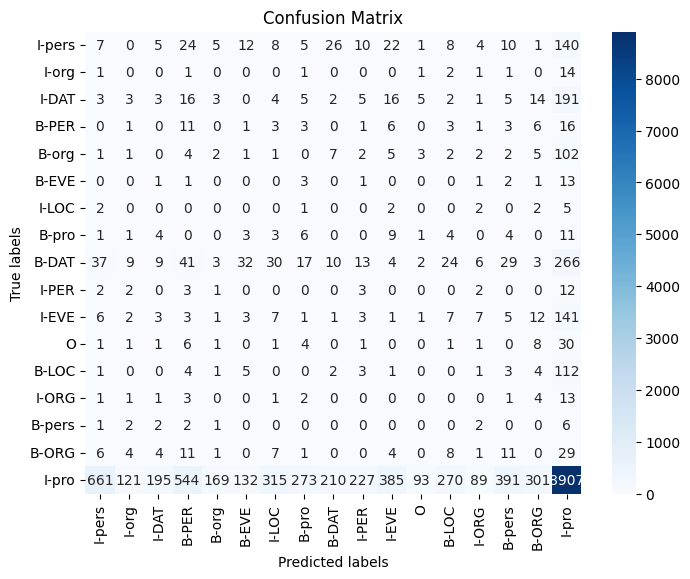

In [22]:
cm = confusion_matrix(all_true_tags, all_predicted_tags)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(tags), yticklabels=set(tags))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
